# Lab | Evaluation Supervised Learning
- In this lab, we will practice calculating metrics that we could use to measure the performance of both regression and classification models

## Import libraries here

In [1]:
# Your code here
import pandas as pd

# California dataset

## Load dataset
- Run the code below to import the dataset and separate X and y
- The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.
```python
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])
data = pd.concat([X, y], axis=1)
```

In [2]:
from sklearn.datasets import fetch_california_housing
print(fetch_california_housing()['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [3]:

data = fetch_california_housing()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])
data = pd.concat([X, y], axis=1)

In [4]:
data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MEDV
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Split dataset
- Split this data set into `training` (80%) and `testing` (20%) sets

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [6]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
15837,5.0505,52.0,4.653846,0.988166,725.0,2.144970,37.75,-122.44
14627,3.6492,8.0,4.577447,1.235440,1297.0,1.607187,32.76,-117.18
10041,2.2083,52.0,4.856187,1.033445,637.0,2.130435,39.21,-121.06
18405,4.2885,16.0,5.717338,1.068200,2965.0,2.436319,37.25,-121.86
14756,2.5625,23.0,4.589091,1.069091,5176.0,18.821818,32.56,-116.97
...,...,...,...,...,...,...,...,...
11658,3.7885,21.0,4.750000,1.055556,1173.0,2.715278,33.82,-118.02
18533,1.9286,29.0,3.896813,1.133536,1743.0,2.644917,36.97,-122.02
16408,2.7958,32.0,5.063260,1.148418,1342.0,3.265207,37.95,-121.23
8805,15.0001,34.0,8.783019,1.059748,1871.0,2.941824,33.76,-118.34


In [7]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
3939,4.7125,27.0,6.421512,1.026163,1034.0,3.005814,34.21,-118.58
15725,3.8750,44.0,4.739264,1.024540,561.0,1.720859,37.78,-122.44
3091,1.4141,18.0,5.907692,1.351282,782.0,2.005128,35.62,-118.45
17326,4.2222,18.0,6.436314,1.162602,1048.0,2.840108,34.64,-120.08
1536,4.8088,32.0,5.285546,1.012926,1818.0,2.136310,37.90,-122.05
...,...,...,...,...,...,...,...,...
11,3.2705,52.0,4.772480,1.024523,1504.0,2.049046,37.85,-122.26
3802,2.7730,20.0,3.884141,1.207028,2824.0,2.681861,34.20,-118.43
2111,1.7994,42.0,4.778539,1.073059,1621.0,3.700913,36.76,-119.74
13947,3.0434,22.0,19.163121,3.936170,1062.0,2.510638,34.24,-117.20


In [8]:
y_train

,MEDV
15837,3.80400
14627,1.58900
10041,1.03900
18405,2.62400
14756,1.53300
...,...
11658,2.04500
18533,1.95300
16408,0.59000
8805,5.00001


In [9]:
y_test

,MEDV
3939,2.509
15725,4.125
3091,0.758
17326,3.750
1536,3.212
...,...
11,2.418
3802,1.405
2111,0.587
13947,1.372


## Train a Linear Regression
- Train a `LinearRegression` model on this data set.
- Generate predictions on both the training and the testing set.
```python
from sklearn.linear_model import LinearRegression
```

In [10]:
# Your code here
from sklearn.linear_model import LinearRegression
model_lr= LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

## Calculate the R-squared
- Calculate and print R-squared for both the training and the testing set.
```python
from sklearn.metrics import r2_score
```

In [11]:
# Your code here
from sklearn.metrics import r2_score
print(f'Train r2 {model_lr.score(X_train,y_train)}, test r2 {model_lr.score(X_test,y_test)}')
print(f'Train r2 {r2_score(y_train,model_lr.predict(X_train))}, test r2 {r2_score(y_test,model_lr.predict(X_test))}')

Train r2 0.6122139900614314, test r2 0.5805720722546992
Train r2 0.6122139900614314, test r2 0.5805720722546992


In [12]:
y_test.mean()

MEDV    2.068352
dtype: float64

## Calculate the mean squared error
- Calculate and print mean squared error for both the training and the testing set.
```python
from sklearn.metrics import mean_squared_error
```

In [13]:
from sklearn.metrics import mean_squared_error
print(f'Train mean_squared_error {mean_squared_error(y_train,model_lr.predict(X_train))}, test mean_squared_error {mean_squared_error(y_test,model_lr.predict(X_test))}')

Train mean_squared_error 0.5156757682702137, test mean_squared_error 0.561434805623462


In [16]:
import numpy as np
np.sqrt(mean_squared_error(y_train,model_lr.predict(X_train)))

0.71810568043305

In [17]:
list(zip(y_train.values,model_lr.predict(X_train)))

[(array([3.804]), array([3.17855138])),
 (array([1.589]), array([2.15202924])),
 (array([1.039]), array([0.7061349])),
 (array([2.624]), array([2.39822674])),
 (array([1.533]), array([1.61274181])),
 (array([2.237]), array([2.20046238])),
 (array([1.39]), array([1.26035988])),
 (array([3.242]), array([2.37252173])),
 (array([1.551]), array([2.01767614])),
 (array([4.158]), array([3.17319523])),
 (array([1.794]), array([1.6996007])),
 (array([0.594]), array([0.54183205])),
 (array([2.23]), array([2.58118527])),
 (array([2.811]), array([2.57183326])),
 (array([3.68]), array([3.3218843])),
 (array([2.094]), array([1.87714097])),
 (array([2.219]), array([2.2071706])),
 (array([1.615]), array([2.26024641])),
 (array([1.128]), array([1.76466123])),
 (array([1.46]), array([2.05653173])),
 (array([5.00001]), array([3.62328903])),
 (array([4.072]), array([2.99957327])),
 (array([1.435]), array([1.49590757])),
 (array([1.568]), array([1.5230604])),
 (array([2.549]), array([3.14106691])),
 (array

In [18]:
np.sqrt(((y_train - model_lr.predict(X_train))**2).mean())

MEDV    0.718106
dtype: float64

## Calculate the mean absolute error
- Calculate and print mean absolute error for both the training and the testing set
```python
from sklearn.metrics import mean_absolute_error
```

In [19]:
# Your code here
from sklearn.metrics import mean_absolute_error
print(f'Train  mean_absolute_error { mean_absolute_error(y_train,model_lr.predict(X_train))}, test  mean_absolute_error { mean_absolute_error(y_test,model_lr.predict(X_test))}')

Train  mean_absolute_error 0.5276177172790256, test  mean_absolute_error 0.5364947680251875


In [20]:
np.abs((y_train - model_lr.predict(X_train))).mean()

MEDV    0.527618
dtype: float64

In [21]:
np.abs((y_train - model_lr.predict(X_train))).sort_values('MEDV',ascending=False)

,MEDV
18501,5.868851
11912,4.479519
6688,4.161202
12138,4.152912
4861,4.014394
...,...
11365,0.000369
20217,0.000286
4168,0.000268
15955,0.000264


___________________________

# Iris dataset

## Load dataset
- Run the code below to import the dataset and separate X and y
- The class field represents the type of flower and is the target variable that we will want to predict.
```python
from sklearn.datasets import load_iris
data = load_iris()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])
data = pd.concat([X, y], axis=1)
```

In [22]:
from sklearn.datasets import load_iris
print(load_iris()['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [23]:

data = load_iris()
X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])
data = pd.concat([X, y], axis=1)


## Split dataset
- Split this data set into `training` (80%) and `testing` (20%) sets

In [24]:
# Your code here
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8)

In [25]:
y_train

,class
109,2
127,2
135,2
6,0
56,1
...,...
11,0
44,0
29,0
146,2


## Train a Logistic Regression
- Train a LogisticRegression model on this data set.
- Generate predictions on both the training and the testing set.
```python
from sklearn.linear_model import LogisticRegression
```

In [33]:
data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

<Axes: xlabel='sepal length (cm)', ylabel='petal length (cm)'>

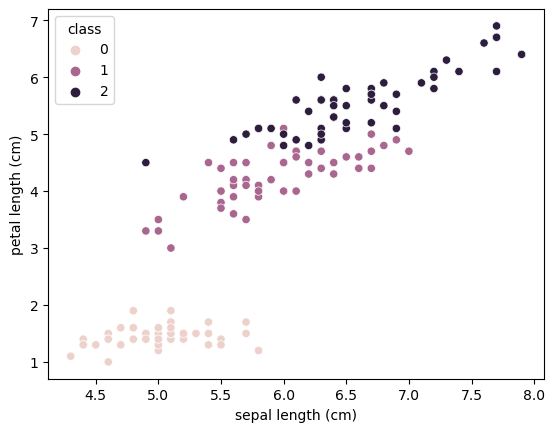

In [35]:
import seaborn as sns
sns.scatterplot(data=data,x='sepal length (cm)',y='petal length (cm)',hue='class')

In [26]:
# Your code here
from sklearn.linear_model import LogisticRegression
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train,y_train['class'])

LogisticRegression(max_iter=1000)

In [27]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

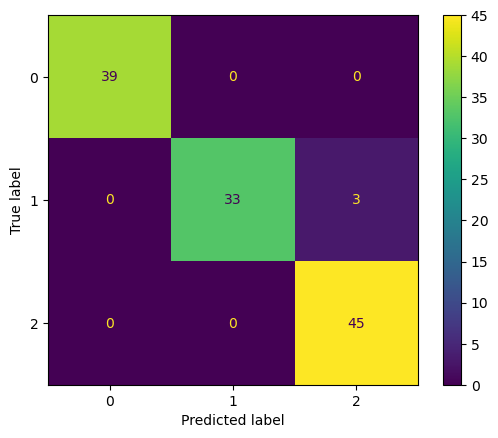

In [28]:
ConfusionMatrixDisplay.from_estimator(model_log,X_train,y_train)

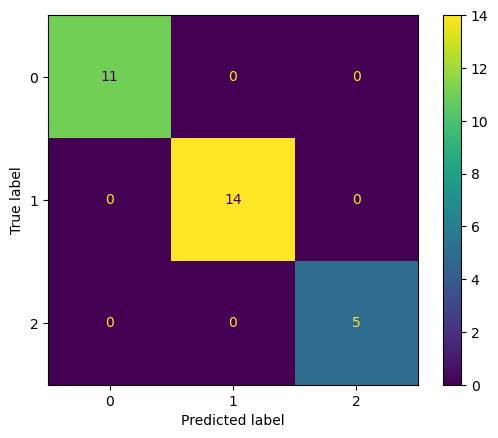

In [29]:
ConfusionMatrixDisplay.from_estimator(model_log,X_test,y_test)

## Calculate the accuracy score
- Calculate and print the accuracy score for both the training and the testing set
```python
from sklearn.metrics import accuracy_score
```

In [36]:
# Your code here
from sklearn.metrics import accuracy_score
print(f'Train  accuracy_score { accuracy_score(y_train,model_log.predict(X_train))}, test accuracy_score { accuracy_score(y_test,model_log.predict(X_test))}')

Train  accuracy_score 0.975, test accuracy_score 1.0


## Calculate the balanced accuracy
- Calculate and print the balanced accuracy score for both the training and the testing set.
```python
from sklearn.metrics import balanced_accuracy_score
```

In [58]:
from sklearn.metrics import balanced_accuracy_score
print(f'Train balanced_accuracy_score { balanced_accuracy_score(y_train,model_log.predict(X_train))}, test balanced_accuracy_score { balanced_accuracy_score(y_test,model_log.predict(X_test))}')


Train balanced_accuracy_score 0.9722222222222222, test balanced_accuracy_score 1.0


## Calculate the precision score
-  Calculate and print the precision score for both the training and the testing set.
```python
from sklearn.metrics import precision_score
```

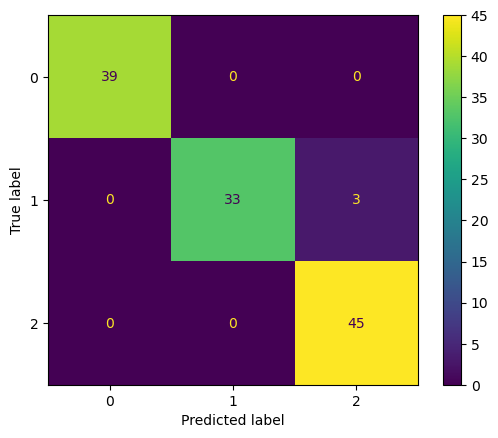

In [38]:
ConfusionMatrixDisplay.from_estimator(model_log,X_train,y_train)

In [53]:
positve_as_1 = pd.DataFrame({'Negative_prediction':[84,3],
              'Positive_prediction':[0,33]},index=['Negative_reality','Positive_reality'])
positve_as_1
positve_as_0 = pd.DataFrame({'Negative_prediction':[78,3],
              'Positive_prediction':[0,39]},index=['Negative_reality','Positive_reality'])
positve_as_0
positve_as_2 = pd.DataFrame({'Negative_prediction':[72,0],
              'Positive_prediction':[3,45]},index=['Negative_reality','Positive_reality'])
positve_as_2

,Negative_prediction,Positive_prediction
Negative_reality,72,3
Positive_reality,0,45


In [49]:
from sklearn.metrics import precision_score
print(f'Train  precision_score { precision_score(y_train,model_log.predict(X_train),average="micro")}, test precision_score { precision_score(y_test,model_log.predict(X_test),average="micro")}')
print(f'Train  precision_score { precision_score(y_train,model_log.predict(X_train),average="macro")}, test precision_score { precision_score(y_test,model_log.predict(X_test),average="macro")}')
print(f'Train  precision_score { precision_score(y_train,model_log.predict(X_train),average="weighted")}, test precision_score { precision_score(y_test,model_log.predict(X_test),average="weighted")}')
print(f'Train  precision_score { precision_score(y_train,model_log.predict(X_train),average=None)}, test precision_score { precision_score(y_test,model_log.predict(X_test),average=None)}')

Train  precision_score 0.975, test precision_score 1.0
Train  precision_score 0.9791666666666666, test precision_score 1.0
Train  precision_score 0.9765625, test precision_score 1.0
Train  precision_score [1.     1.     0.9375], test precision_score [1. 1. 1.]


## Calculate the recall score
- Calculate and print the recall score for both the training and the testing set.
```python
from sklearn.metrics import recall_score
```

In [54]:
from sklearn.metrics import recall_score
print(f'Train  recall_score { recall_score(y_train,model_log.predict(X_train),average="micro")}, test recall_score { recall_score(y_test,model_log.predict(X_test),average="micro")}')
print(f'Train  recall_score { recall_score(y_train,model_log.predict(X_train),average="macro")}, test recall_score { recall_score(y_test,model_log.predict(X_test),average="macro")}')
print(f'Train  recall_score { recall_score(y_train,model_log.predict(X_train),average="weighted")}, test recall_score { recall_score(y_test,model_log.predict(X_test),average="weighted")}')
print(f'Train  recall_score { recall_score(y_train,model_log.predict(X_train),average=None)}, test recall_score { recall_score(y_test,model_log.predict(X_test),average=None)}')

Train  recall_score 0.975, test recall_score 1.0
Train  recall_score 0.9722222222222222, test recall_score 1.0
Train  recall_score 0.975, test recall_score 1.0
Train  recall_score [1.         0.91666667 1.        ], test recall_score [1. 1. 1.]


## Calculate the F1 score 
- Calculate and print the F1 score for both the training and the testing set.
```python
from sklearn.metrics import f1_score
```

In [56]:
from sklearn.metrics import f1_score
print(f'Train  f1_score { f1_score(y_train,model_log.predict(X_train),average="micro")}, test f1_score { f1_score(y_test,model_log.predict(X_test),average="micro")}')
print(f'Train  f1_score { f1_score(y_train,model_log.predict(X_train),average="macro")}, test f1_score { f1_score(y_test,model_log.predict(X_test),average="macro")}')
print(f'Train  f1_score { f1_score(y_train,model_log.predict(X_train),average="weighted")}, test f1_scoree { f1_score(y_test,model_log.predict(X_test),average="weighted")}')
print(f'Train  f1_score { f1_score(y_train,model_log.predict(X_train),average=None)}, test f1_score { f1_score(y_test,model_log.predict(X_test),average=None)}')

Train  f1_score 0.975, test f1_score 1.0
Train  f1_score 0.9747545582047685, test f1_score 1.0
Train  f1_score 0.974859747545582, test f1_scoree 1.0
Train  f1_score [1.         0.95652174 0.96774194], test f1_score [1. 1. 1.]


## Generate confusion matrices
- Generate confusion matrices for both the training and the testing set.

In [ ]:
# Your code here